In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
 data = pd.read_excel('C:/Users/Admin/Downloads/Gold_data.xlsx')
data.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [5]:
data=pd.concat([data])
data=data.sort_values(by='date', ascending=True)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data=data.set_index('date')

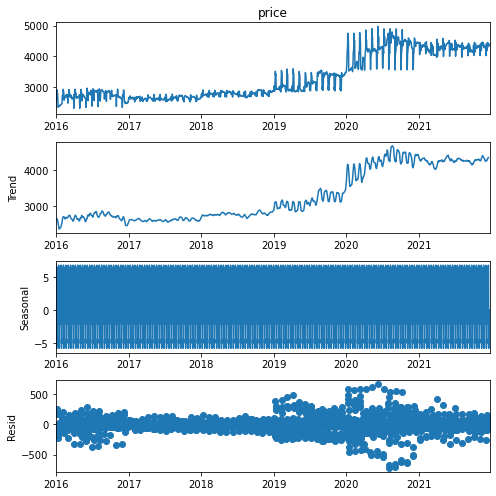

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

df1=data.sort_values(by='date', ascending=True)
matplotlib.rc('figure', figsize=(7, 7))
decompose = seasonal_decompose(data.price, period=12, model='additive')
decompose.plot()
plt.show() 

In [11]:
data

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [12]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [25]:
X = data.values
X = X.astype('float32')

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(17,12), 'figure.dpi':120})

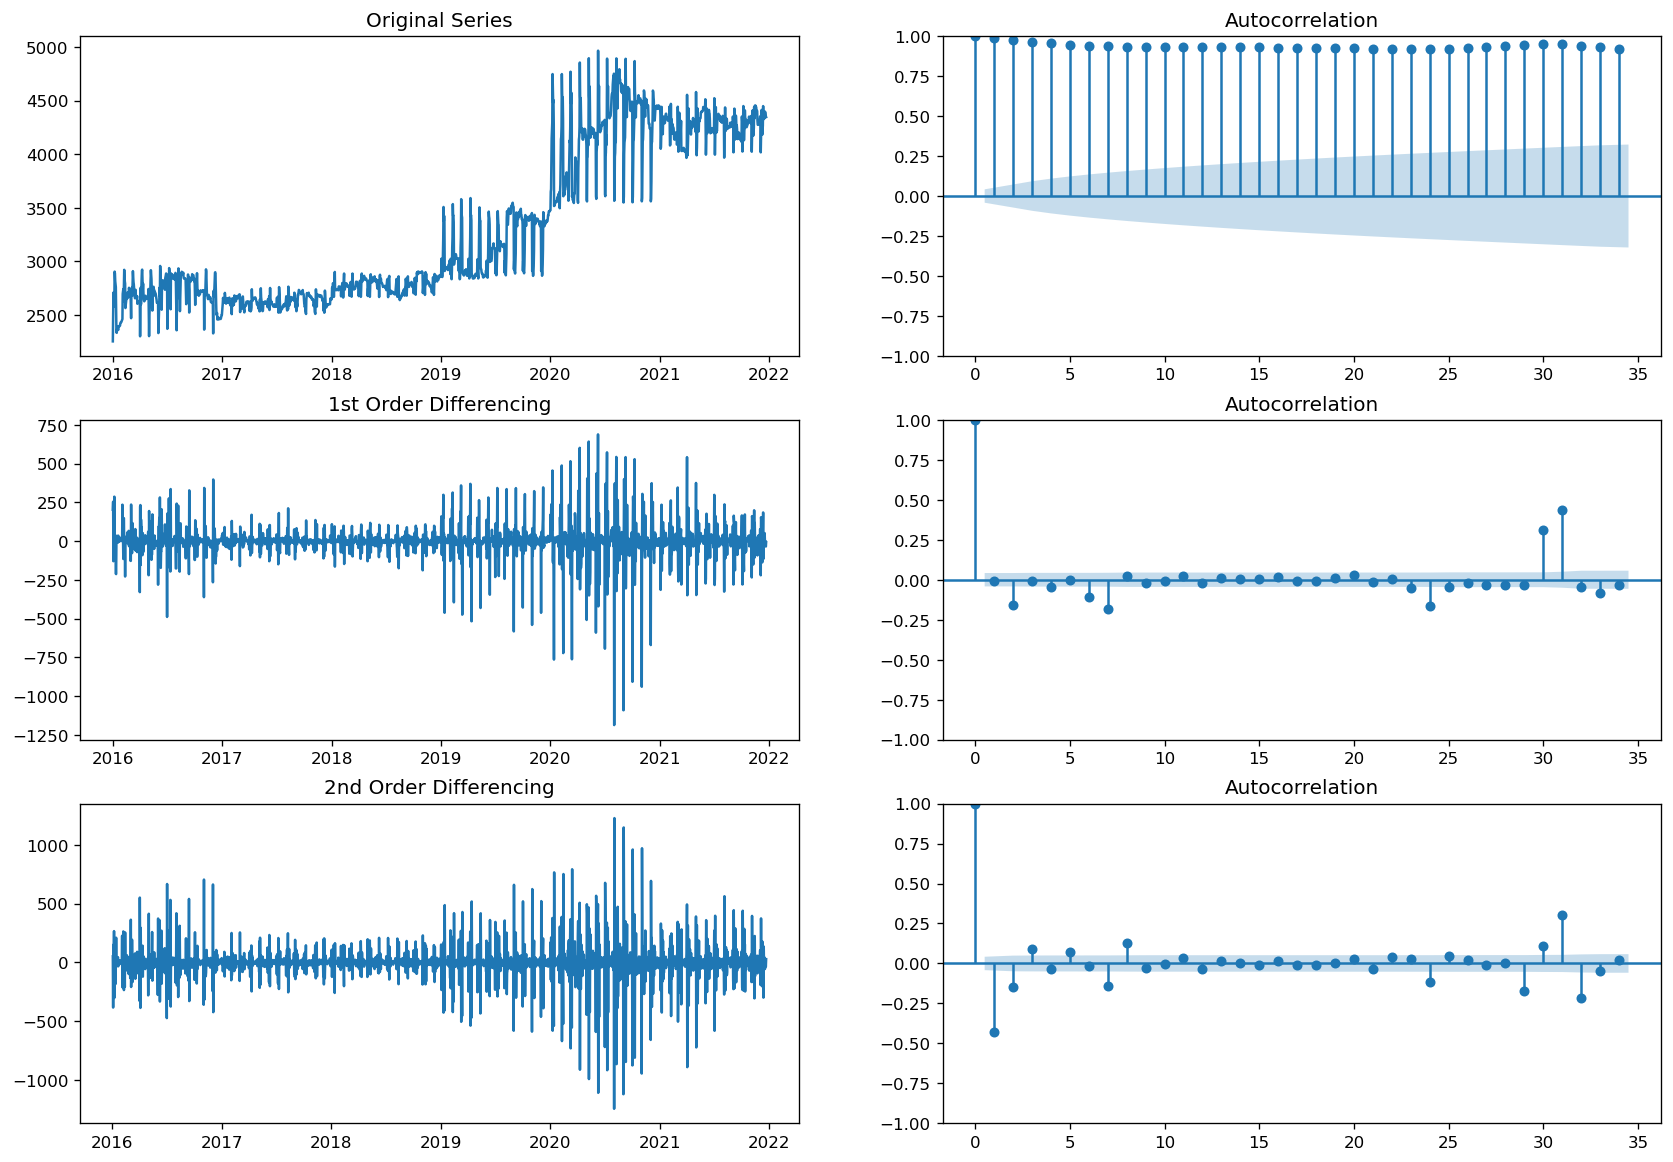

In [29]:
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(data.price); axes[0, 0].set_title('Original Series')
plot_acf(data.price, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.price.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.price.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.price.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.price.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

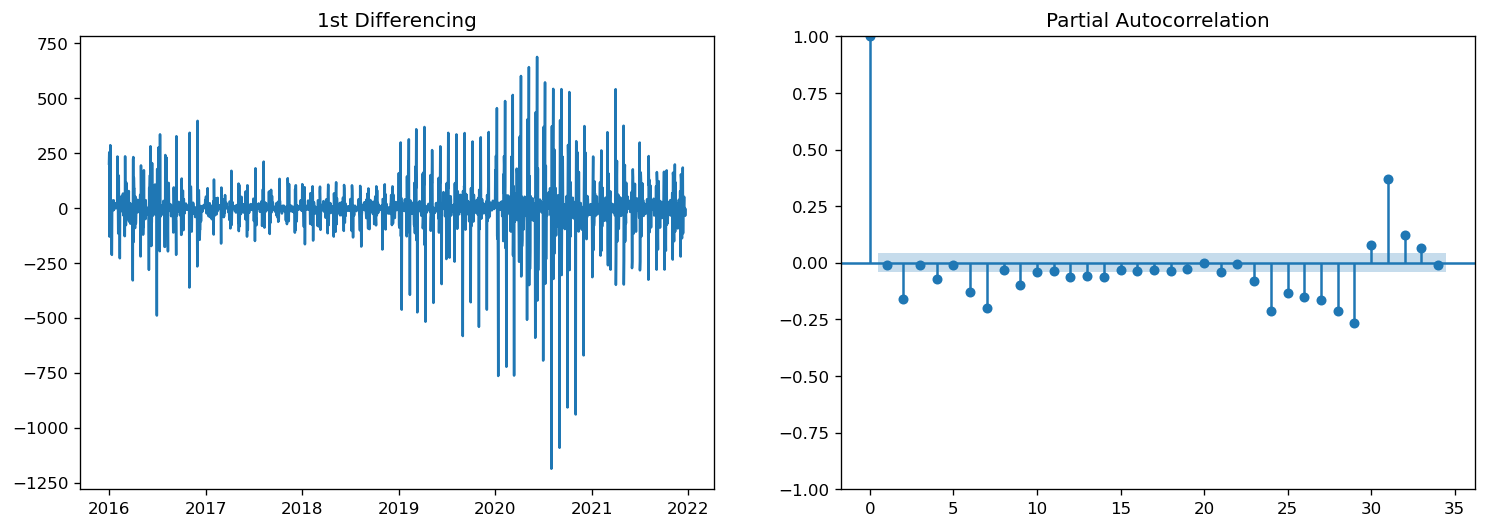

In [32]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(15,5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(data.price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data.price.diff().dropna(), ax=axes[1])

plt.show()

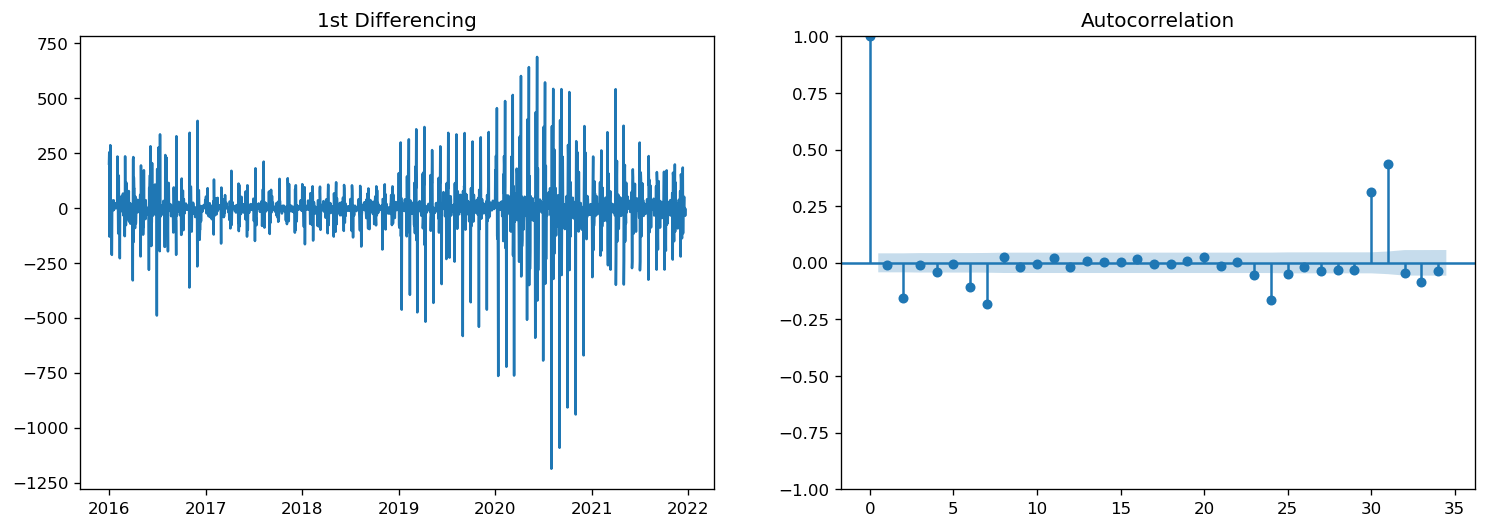

In [33]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(data.price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(data.price.diff().dropna(), ax=axes[1])

plt.show()

In [34]:
from statsmodels.tsa.arima_model import ARIMA

In [35]:
# separate out a validation dataset
split_point = len(data)-152
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 2030, Validation 152
